In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# from pyclustering.cluster.kmedians import kmedians
from scipy.spatial.distance import cdist
import seaborn as sns 
# from heatmapcluster import heatmapcluster

(32, 4)
  Kepolisian Daerah  penipuan / perbuatan curang  penggelapan  korupsi
0              Aceh                          417          444       50
1     sumatra Utara                         2881         2059       83
2     sumatra Barat                         1279         1379       84
3              Riau                          819          389       59
4             Jambi                         1047          988       48


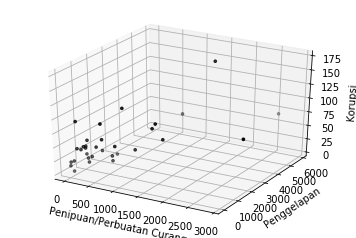

In [4]:
data = pd.read_csv(r'C:\Users\Muarrikh Yazka\Downloads\Kriminal.csv')
print(data.shape)
print(data.head())
col1 = data['penipuan / perbuatan curang']
col2 = data['penggelapan']
col3 = data['korupsi']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(col1, col2, col3, c='black', s=7)
ax.set_xlabel('Penipuan/Perbuatan Curang')
ax.set_ylabel('Penggelapan')
ax.set_zlabel('Korupsi')
plt.show()

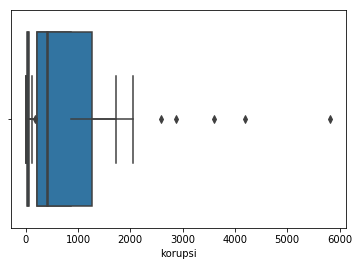

In [14]:
sns.boxplot(x=col1)



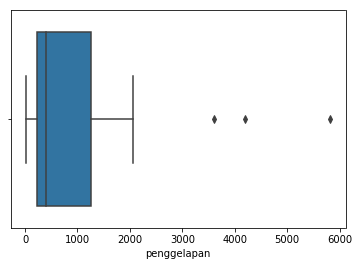

In [15]:
sns.boxplot(x=col2)

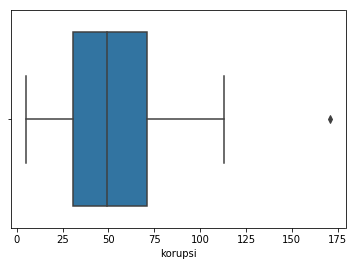

In [16]:
sns.boxplot(x=col3)

NameError: name 'kmedians' is not defined

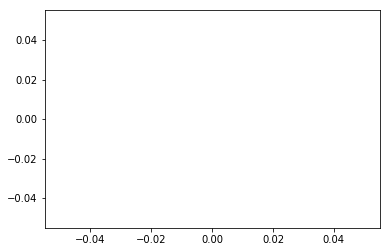

In [6]:
# create new plot and data
plt.plot()
X = np.array(list(zip(col1, col2, col3))).reshape(len(col1), 3)
#X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = kmedians(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

[[1331.42857143 1399.           73.57142857]
 [ 306.95454545  330.36363636   43.04545455]
 [1857.66666667 4542.66666667  106.        ]]
[1 0 0 1 0 0 1 1 1 1 2 2 0 0 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


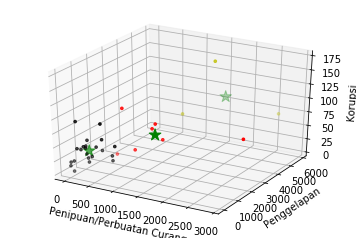

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

LABEL_COLOR_MAP = {0 : 'r', 1 : 'k', 2 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='*', c='green', s=150)
ax.scatter(col1, col2, col3, c=label_color, s=7)
ax.set_xlabel('Penipuan/Perbuatan Curang')
ax.set_ylabel('Penggelapan')
ax.set_zlabel('Korupsi')
plt.show()


In [11]:
#result = [data['Kepolisian Daerah'], pd.DataFrame(labels)]
result = pd.concat([data['penipuan / perbuatan curang'], data['penggelapan'], data['korupsi'], pd.DataFrame(labels)], axis=1)
result.columns = ['Penipuan / Perbuatan Curang', 'Penggelapan', 'Korupsi', 'Cluster']
print(result)
#print(fix_result)

    Penipuan / Perbuatan Curang  Penggelapan  Korupsi  Cluster
0                           417          444       50        1
1                          2881         2059       83        0
2                          1279         1379       84        0
3                           819          389       59        1
4                          1047          988       48        0
5                          1490         1381       68        0
6                           356          355       33        1
7                           658          722       34        1
8                            68           78       24        1
9                           294          351       22        1
10                         2595         5823       69        2
11                         1247         3608       78        2
12                         1351         1353       94        0
13                          548         1404       25        0
14                         1731         4197      171  

    Penipuan / Perbuatan Curang  Penggelapan  Korupsi  Cluster
1                          2881         2059       83        0
2                          1279         1379       84        0
4                          1047          988       48        0
5                          1490         1381       68        0
13                          548         1404       25        0
12                         1351         1353       94        0
25                          724         1229      113        0
0                           417          444       50        1
21                          247          153       52        1
22                          530          398       94        1
23                          452          735       40        1
26                          218          399       49        1
20                          142           64       48        1
27                          280          350       29        1
28                           10           21       15  

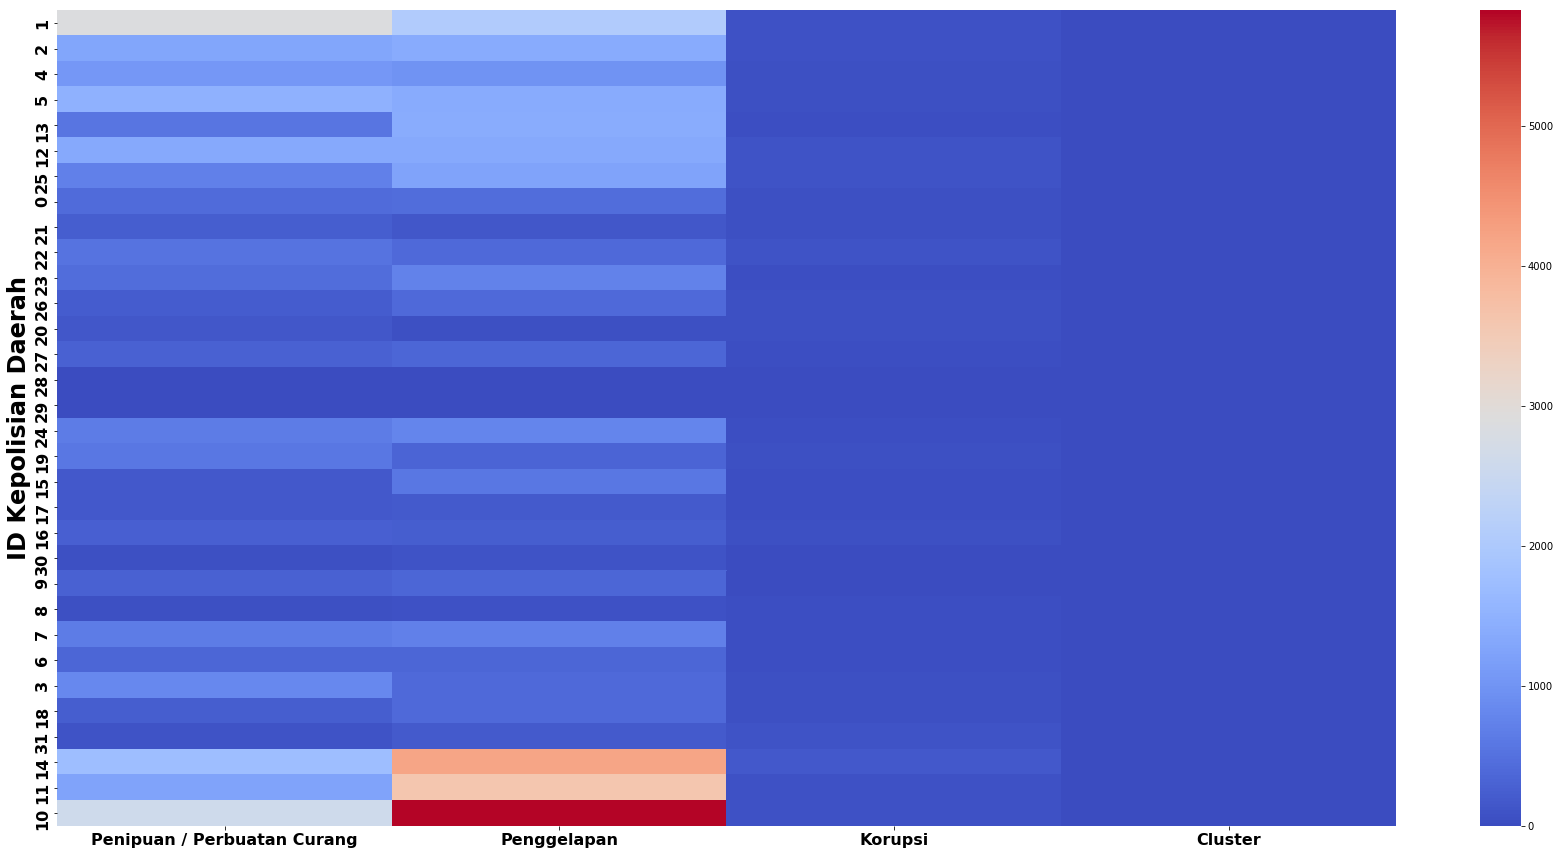

In [12]:
result=result.sort_values(by=['Cluster'])
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(result, ax = ax2, cmap = 'coolwarm')
print(result)


ax2.set_ylabel('ID Kepolisian Daerah', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")
    
